In [1]:
# import necessary library
import psycopg2
#import library pandas
import pandas as pd
#import library sqlio
import pandas.io.sql as sqlio

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_colwidth', None)

#create database connection variable 
conn = psycopg2.connect(user="postgres", password="root1234", host="localhost", database="DVDRental")

#### CREATE TABLE:

#### SELECT INTO:
* used to create a new table and inserts data returned from a query into the table.

* New table will have columns with the names the same as column of the result set of the query.

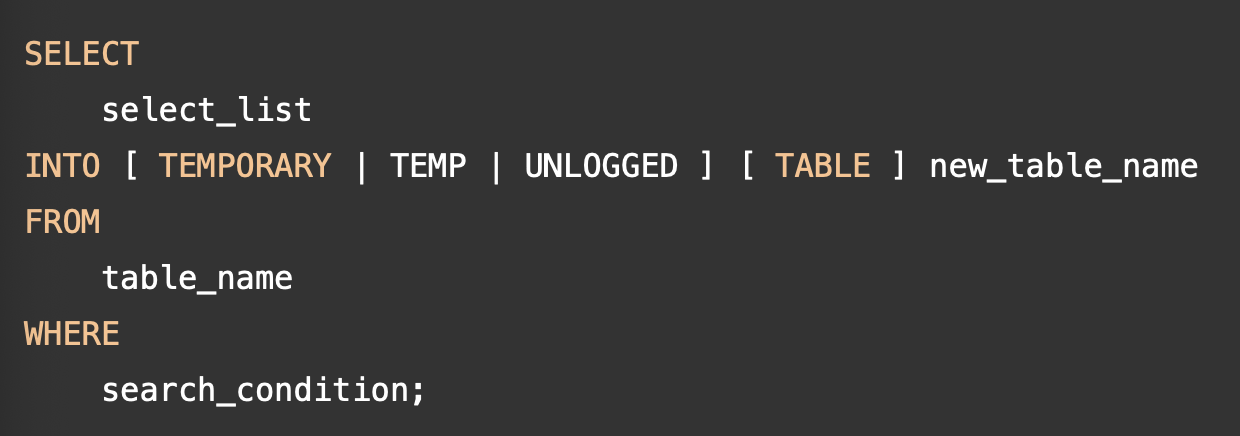

* TEMP or TEMPORARY keyword is optional.

Write a query to create a new table film_r that contains films with the rating R and rental duration 5 days from the 'film' table

Execute the following query in a sql editor

SELECT film_id, title, rental_rate
INTO TABLE film_r
FROM film WHERE rating = 'R' AND rental_duration = 5
ORDER BY title;

In [ ]:
query = """select * from film_r;"""

sqlio.read_sql_query(query,conn)

#### CREATE TABLE AS:
* this statement creates a new table and fills it with the data returned by a query.

**Syntex:**
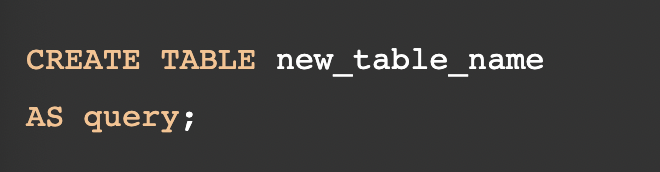

CREATE TABLE action_film_1 AS
SELECT film_id, title, release_year from film
where rating = 'R'
AND rental_duration = 5

In [3]:
query = """SELECT * from film_category LIMIT 10;"""

sqlio.read_sql_query(query,conn)

,film_id,category_id,last_update
0,1,6,2006-02-15 10:07:09
1,2,11,2006-02-15 10:07:09
2,3,6,2006-02-15 10:07:09
3,4,11,2006-02-15 10:07:09
4,5,8,2006-02-15 10:07:09
5,6,9,2006-02-15 10:07:09
6,7,5,2006-02-15 10:07:09
7,8,11,2006-02-15 10:07:09
8,9,11,2006-02-15 10:07:09
9,10,15,2006-02-15 10:07:09


CREATE TABLE action_film_2 AS
SELECT
    film_id,
    title,
    release_year,
    length,
    rating
FROM
    film
INNER JOIN film_category USING (film_id)
WHERE
    category_id = 1;


Note that the CREATE TABLE AS statement is similar to the SELECT INTO statement, but the CREATE TABLE AS statement is preferred because it is not confused with other uses of the SELECT INTO syntax in PL/pgSQL. In addition, the CREATE TABLE AS statement provides a superset of functionality offered by the SELECT INTO statement.

#### ALTER TABLE:
* used to change the structure of a existing table.

Syntex:

**ALTER TABLE table_name action;**

PostgreSQL provides the following functions:
* Add a column
* Drop a column
* Change the data type of a column
* Rename a column
* Set a default value for the column
* Add a constraint to a column
* Rename a table

##### Add a column

ALTER TABLE table_name 
ADD COLUMN column_name datatype column_constraint;

* You can add multiple columns at at time.

##### Drop a column

IF a column you want to drop is being used in other database objects such as views, triggers, stored procedures etc, the column can not be dropped.

##### Rename a column

To rename multiple columns in one command

If you rename a column referenced by other database objects such as views, foreign key constraints, triggers, and stored procedures, PostgreSQL will automatically change the column name in the dependent objects.

#### Change a defalult value

##### Change the data type of a column

PostgreSQL allows you to convert the values of a column to the new ones while changing its data type by adding a USING clause as follows:

ALTER TABLE table_name
ALTER COLUMN column_name TYPE new_data_type USING expression;

#### Add the NOT NULL constraint

#### Add a check constraint

##### Add constraint

##### DROP TABLE:
Remove existing tables from the database

##### TRUNCATE TABLE:
* To remove all data from a table, we use the DELETE statement.
* However, Delete statement is not efficient when you have to delete a big table.
* Truncate table delete all data from a table without scanning it.

The TRUNCATE TABLE is transaction-safe. It means that you can roll it back safely.

##### Copy table:
copies a table completely, including both table structure and data. 

##### Below command will copy structure as well as data.

##### Structure only

##### Partial data (WHERE condition)

All the Above statements copy table structure and data but do not copy indexes and constraints of the existing table.